## Objective: 準確預測房價

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()
df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
df['answer'] = boston['target'] #新增「答案」欄位
df.to_csv('boston.csv', encoding='utf-8', index=False)
df.to_excel('boston.xlsx' ,sheet_name = 'boston', index = False)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,answer
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [2]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

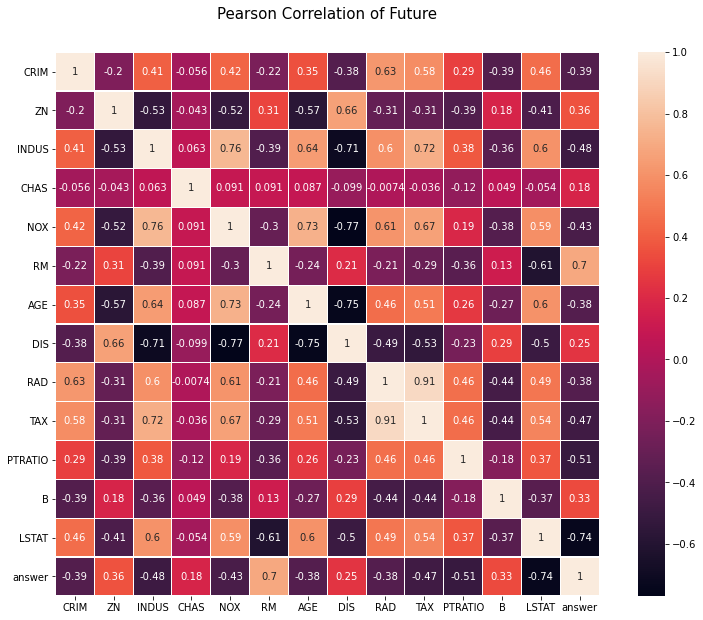

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 相關係數：兩個東西的相關性
# 完全正相關:1；完全負相關:-1
plt.figure(figsize=(14,10))
plt.title('Pearson Correlation of Future', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(), linewidths=0.1, square=True, linecolor='white', annot=True)

In [4]:
# step1: 資料分成兩份：訓練資料 & 驗證資料
from sklearn.model_selection import train_test_split
# 90%訓練題目(x_train) + 90%訓練答案(y_train) ； 10%驗證題目(x_test) + 10%驗證答案(y_test) 
# [90%訓練題目(x_train), 10%驗證題目(x_test), 90%訓練答案(y_train), 10%驗證答案(y_test)]
x_train, x_test, y_train, y_test = train_test_split(boston['data'], boston['target'], test_size = 0.1)

In [5]:
# step2: 準備方法－決策樹
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=5)
# 〔參數〕
# max_depth：The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. → int

reg

DecisionTreeRegressor(max_depth=5)

In [6]:
# step3: 讀取訓練資料、做考古題(fit)
reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5)

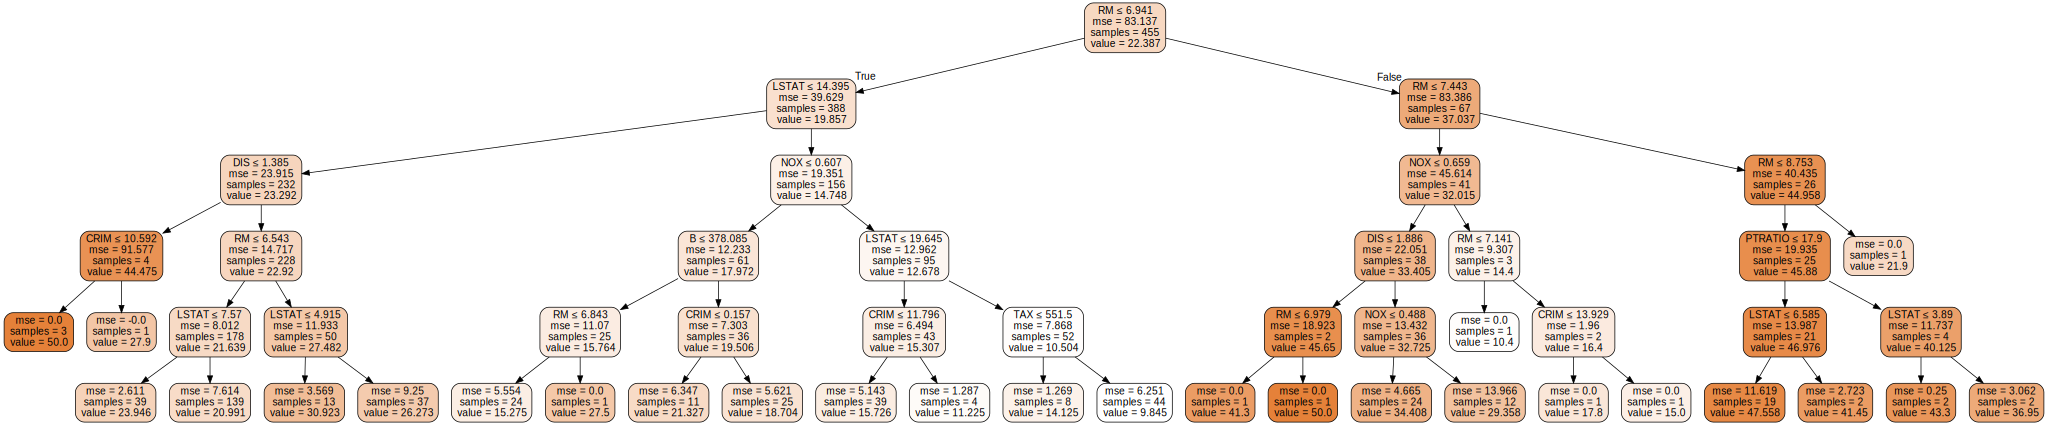

In [14]:
from sklearn.tree import export_graphviz
import graphviz

graph = export_graphviz(reg, out_file=None, feature_names=boston['feature_names'], filled=True, rounded=True, special_characters=True)

# 〔參數〕
# feature_names：Names of each of the features. → list of str 

# filled：填顏色 → bool
# max_depth：The maximum depth of the representation. If None, the tree is fully generated.（圖表要畫幾層，不影響模型預測） → int

graph = graphviz.Source(graph)

# RM：住宅的平均房間數 → 坪數
# PTRATIO：城鎮學生教師比例 → 教育程度、是否在學區附近
# LSTAT：低收入人群比例 → 貧民窟
# DIS：到5個波士頓就業中心的加權距離 → 距離工作地方遠近
# CRIM：人均犯罪率

graph.render('boston') #輸出pdf
graph

In [8]:
# step4: 答題，回答驗證題目（predict）
pre = reg.predict(x_test)
pre # 根據value

array([14.125     , 18.704     , 15.275     , 20.99136691, 15.72564103,
       30.92307692, 23.94615385, 20.99136691, 18.704     , 29.35833333,
       20.99136691, 23.94615385, 20.99136691, 20.99136691, 47.55789474,
       34.40833333,  9.84545455, 15.275     , 20.99136691, 41.45      ,
       30.92307692, 18.704     , 15.275     , 20.99136691, 14.125     ,
        9.84545455, 15.72564103, 20.99136691, 34.40833333, 15.72564103,
       29.35833333, 15.72564103, 20.99136691, 15.72564103, 18.704     ,
       15.72564103, 34.40833333, 23.94615385, 30.92307692, 20.99136691,
       23.94615385, 47.55789474, 26.27297297, 50.        , 47.55789474,
       20.99136691, 15.72564103, 20.99136691, 20.99136691, 15.72564103,
       26.27297297])

In [17]:
# 使用Numpy來實現兩個list的直接相減
import numpy as np
print(f'實際的價錢：{y_test}')
print(f'預測的價錢：{pre}')
interval = np.subtract(pre, y_test)
print(f'差異：{interval}')

實際的價錢：[17.8 15.6 13.9 17.6 18.  22.8 22.9 19.3 21.7 36.5 19.4 23.1 24.4 22.5
 44.  29.6 10.9 20.4 21.6 50.  31.6 19.4 23.7 22.  13.3  7.2 19.  21.4
 33.4 17.8 31.7 17.4 26.4 13.4 21.4 14.9 33.4 28.7 26.6 21.8 22.1 48.3
 25.  50.  41.7 11.9 14.1 19.9 21.1 16.7 28.4]
預測的價錢：[14.125      18.704      15.275      20.99136691 15.72564103 30.92307692
 23.94615385 20.99136691 18.704      29.35833333 20.99136691 23.94615385
 20.99136691 20.99136691 47.55789474 34.40833333  9.84545455 15.275
 20.99136691 41.45       30.92307692 18.704      15.275      20.99136691
 14.125       9.84545455 15.72564103 20.99136691 34.40833333 15.72564103
 29.35833333 15.72564103 20.99136691 15.72564103 18.704      15.72564103
 34.40833333 23.94615385 30.92307692 20.99136691 23.94615385 47.55789474
 26.27297297 50.         47.55789474 20.99136691 15.72564103 20.99136691
 20.99136691 15.72564103 26.27297297]
差異：[-3.675       3.104       1.375       3.39136691 -2.27435897  8.12307692
  1.04615385  1.69136691 -2.996    

In [19]:
from sklearn.metrics import r2_score
print(f'訓練資料 r2 score：{r2_score(y_true=y_train, y_pred=reg.predict(x_train))}')
print(f'測試資料 r2 score：{r2_score(y_true=y_test, y_pred=pre)}')
# y_true：Ground truth (correct) target values.
# y_pred：Estimated target values.

訓練資料 r2 score：0.9234470141658031
測試資料 r2 score：0.8648005873002843


In [21]:
# 觀察那些特徵最重要
print(f'特徵：{boston.feature_names}')
reg.feature_importances_

特徵：['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


array([0.01420728, 0.        , 0.        , 0.        , 0.06439855,
       0.61895075, 0.        , 0.0613466 , 0.        , 0.0035491 ,
       0.00451497, 0.0059129 , 0.22711986])